<a href="https://colab.research.google.com/github/schizohub/ML_projects/blob/main/car_number_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing necessary packages(roboflow, easyocr, pytesseract)

In [ ]:

# !pip install roboflow easyocr #pytesseract tesseract
# !pip install easyocr
# !pip install pytesseract

In [ ]:
# !apt-get install tesseract-ocr
# !apt-get install tesseract-ocr-eng
# !pip install pytesseract

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import easyocr as ocr
import numpy as np
import pandas as pd
# import pytesseract as tes

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ODg3GNZvZRLFHyvQUT3K")
project = rf.workspace().project("car-numbers2")
model = project.version(1).model

# infer on a local image
# print(model.predict("mashina1.jpg", confidence=40, overlap=30).json())

# visualize your prediction
# model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

loading Roboflow workspace...
loading Roboflow project...


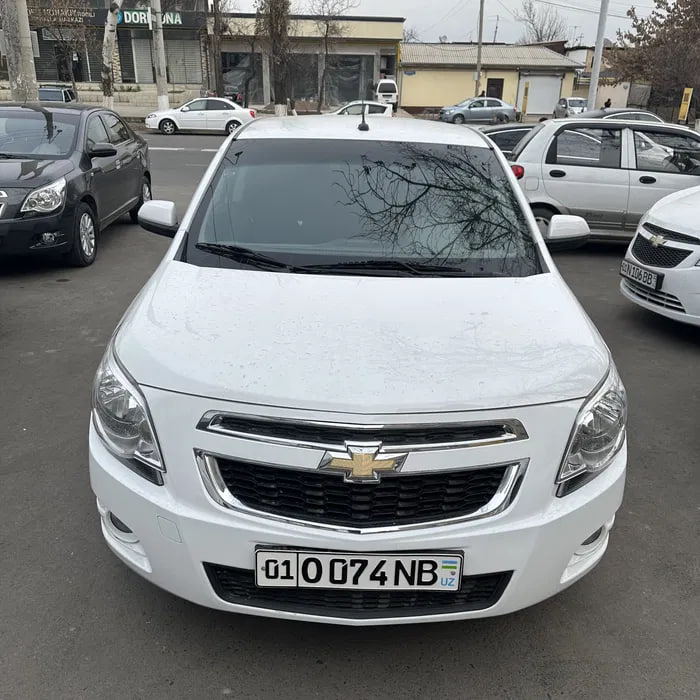

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# Read the image
image = cv.imread('mashina1.jpg')

# Display the image using cv2.imshow()
cv2_imshow(image)


In [ ]:
model.predict("mashina1.jpg", confidence=40, overlap=30).save("pred.jpg")


In [ ]:
class Coordinate:
    def __init__(self, image_path):
        self.img = image_path

    def GetCoordinates(self):
        preds = model.predict(self.img, confidence=40, overlap=30).json()
        preds = pd.Series(preds['predictions'][0])

        return tuple(preds[np.array(preds.index[:4])].values)

    def CropImage(self):
        x,y,w,h = self.GetCoordinates()
        image = cv.imread(self.img)
        cropped_image = image[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)]

        return cropped_image

    def ShowCropped_IMG(self, save=False):
        img = cv.cvtColor(self.CropImage(), cv.COLOR_BGR2GRAY)
        plt.imshow(img)
        plt.axis('off');
        if save:
            cv.imwrite("Cropped.jpg", img)
    
    def SaveOrgIMG(self):
        model.predict(self.img, confidence=40, overlap=30).save("Prediction.jpg")

    def GetText(self, img_path):
        img = cv.imread(img_path)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
        # structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))    
        # imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)    
        # imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)   

        # imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)          
        # gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

        reader = ocr.Reader(['uz'])
        text = reader.readtext(gray)
        txt = text[0]
        plt.imshow(gray)
        plt.axis('off')
        return text

In [ ]:
# x, y, w, h = preds['predictions']

coord = Coordinate("mashina1.jpg")
x,y,w,h = coord.GetCoordinates()

In [ ]:
# plt.imshow(coord.CropImage())
# coord.ShowCropped_IMG(save=True)
cropped_ = coord.CropImage()

In [ ]:
cv.imwrite("Cropped.jpg",cropped_)


True

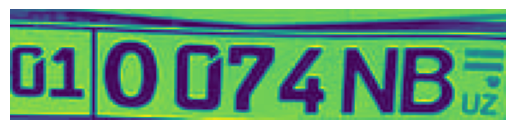

In [ ]:
coord.ShowCropped_IMG()

([[0, 8], [179, 8], [179, 43], [0, 43]], 'D1lO074NB', 0.3711609425803801)

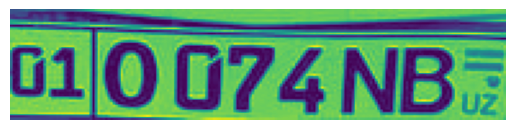

In [ ]:
coord.GetText("Cropped.jpg")

([[0, 15], [354, 15], [354, 86], [0, 86]], '010074NB', 0.9285343867191675)

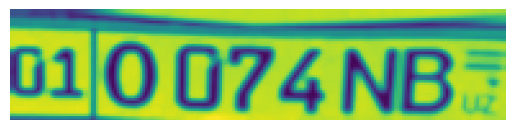

In [ ]:
coord.GetText("/content/Dilated_img.jpg")


([[0, 8], [179, 8], [179, 43], [0, 43]], 'D1lO074NB', 0.2763975342750288)

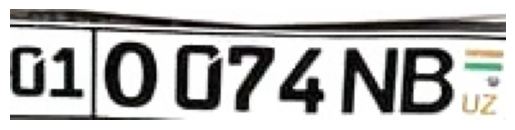

In [ ]:
coord.GetText("/content/Adjusted_img.jpg")

True

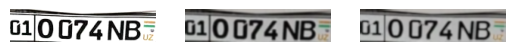

In [ ]:
import cv2
import numpy as np

def increase_contrast(image, alpha, beta):
    # Apply the contrast adjustment
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image

# Read the image
image = cv2.imread("Cropped.jpg")

# Define the contrast adjustment parameters
alpha = 1.5  # Contrast control (1.0 means no change)
beta = 0.5    # Brightness control (0 means no change)

# Increase the contrast
adjusted_image = increase_contrast(image, alpha, beta)
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

new_width = image.shape[1] * 2  # Increase width by a factor of 2
new_height = image.shape[0] * 2  # Increase height by a factor of 2

# Resize the image
resized_image = cv2.resize(denoised_image, (new_width, new_height),interpolation=cv.INTER_AREA)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Kernel for dilation
dilated_image = cv2.dilate(resized_image, kernel)

plt.subplot(1, 3,1)
# plt.imshow(char[i] cmap='gray')
plt.imshow(adjusted_image)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(denoised_image)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(dilated_image)

plt.axis('off')
# plt.savefig("Dilated_img")
cv2.imwrite("Adjusted_img.jpg", adjusted_image)
cv2.imwrite("Dilated_img.jpg",dilated_image)

In [ ]:
ocr.Reader(['uz']).readtext(adjusted_image)


[([[0, 8], [179, 8], [179, 43], [0, 43]], 'D1lO074NB', 0.3200220740329202)]

In [ ]:

import pytesseract
from PIL import Image

image = Image.open('Cropped.jpg')
text = pytesseract.image_to_string(image, lang='eng')
text

'a\n\nbp\n\n \n\n011074 NB>\n\x0c'

In [ ]:
gray = cv.cvtColor(coord.CropImage(), cv.COLOR_BGR2GRAY)

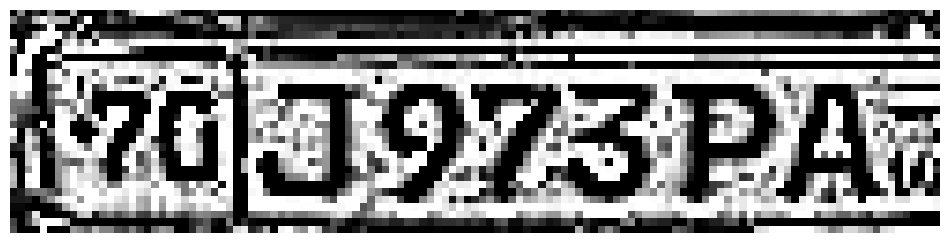

In [ ]:
import cv2

structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))    # Har bir pixelga ishlov berish uchun

imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)     #yorqin 
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)    #qora

imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)           # Yorqinni qo'shamiz
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)     # qorani ayiramiz

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.savefig('Car-Contrast.png',bbox_inches = 'tight')
plt.show()

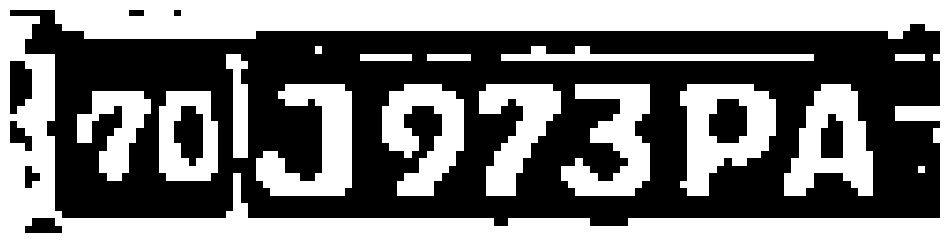

In [ ]:
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)  #Gauss filtri 

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,     #adaptiv metod bilan ajratiladi.
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')
plt.axis('off')
# plt.savefig('Car-Adaptive-Thresholding.png',bbox_inches = 'tight')
plt.show()

In [ ]:
ocr.Reader(['uz']).readtext(gray)

[([[28, 6], [119, 6], [119, 30], [28, 30]], '[J973PA', 0.4021605414607705)]

In [ ]:
ocr.Reader(['uz']).readtext(img_thresh)


[([[0, 4], [120, 4], [120, 30], [0, 30]], 'Jzol2273PA"', 0.22311498799483767)]